In [355]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [356]:
import sys # needed to import cat_utils
sys.path.insert(0, '/Users/abrahamn/21cmIR/21cmIRxcor/')

import imp
import cat_utils
imp.reload(cat_utils)

from astropy.table import Table
from astropy.io import fits

In [364]:
w1scos = pickle.load(open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/w1scos.p",'rb'))
w2scos = pickle.load(open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/w2scos.p",'rb'))

In [357]:
mwa_cat = cat_utils.MWACatalog('mwa_calibration_source_list.sav')

In [358]:
import cPickle as pickle
wisecats = pickle.load(open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/wisecats.p",'rb'))

In [359]:
wisecats_low90 = []
for wi in range(len(wisecats)):
    g = wisecats[wi].jy < np.percentile(wisecats[wi].jy,90)
    wisecats_low90.append(cat_utils.Catalog(wisecats[wi].ra[g],wisecats[wi].dec[g],wisecats[wi].jy[g]))

In [360]:
hdulist = fits.open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/carroll16/KGS.fits')

In [361]:
hdulist[1].data.names

['Name',
 'RAJ2000',
 'DECJ2000',
 'e_RAJ2000',
 'e_DECJ2000',
 'S_182',
 'e_S_182',
 'EB_corr',
 'R_class',
 'Beam',
 'N_det',
 'Match_Type',
 'Inspected',
 'Match_RAJ2000',
 'Match_DECJ2000',
 'e_Match_RAJ2000',
 'e_Match_DECJ2000',
 'SI',
 'e_SI',
 'S_74',
 'e_S_74',
 'S_408',
 'e_S_408',
 'S_843',
 'e_S_843',
 'S_1400',
 'e_S_1400',
 'VLSSr',
 'MRC',
 'SUMSS',
 'NVSS']

(array([ 2304.,   414.,   176.,   875.,  1135.,   196.,  1338.,    65.,
          878.,    13.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

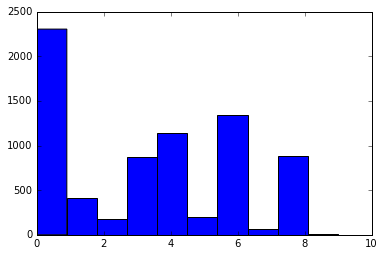

In [362]:
plt.hist(hdulist[1].data['R_class'])

In [500]:
g = (hdulist[1].data['R_class'] <= 3)&(~np.isnan(hdulist[1].data['Match_RAJ2000']))
carroll16cat = cat_utils.Catalog(hdulist[1].data['RAJ2000'][g],\
                                 hdulist[1].data['DECJ2000'][g],\
#                                  hdulist[1].data['S_1400'][g],\
                                 hdulist[1].data['S_182'][g],\
                                 hdulist[1].data['e_RAJ2000'][g],\
                                 hdulist[1].data['e_DECJ2000'][g])
carroll16cat_m = cat_utils.Catalog(hdulist[1].data['Match_RAJ2000'][g],\
                                   hdulist[1].data['Match_DECJ2000'][g],\
                                   hdulist[1].data['S_182'][g],\
#                                    hdulist[1].data['S_1400'][g],\
                                   hdulist[1].data['e_Match_RAJ2000'][g],\
                                   hdulist[1].data['e_Match_DECJ2000'][g])

(-30, -27)

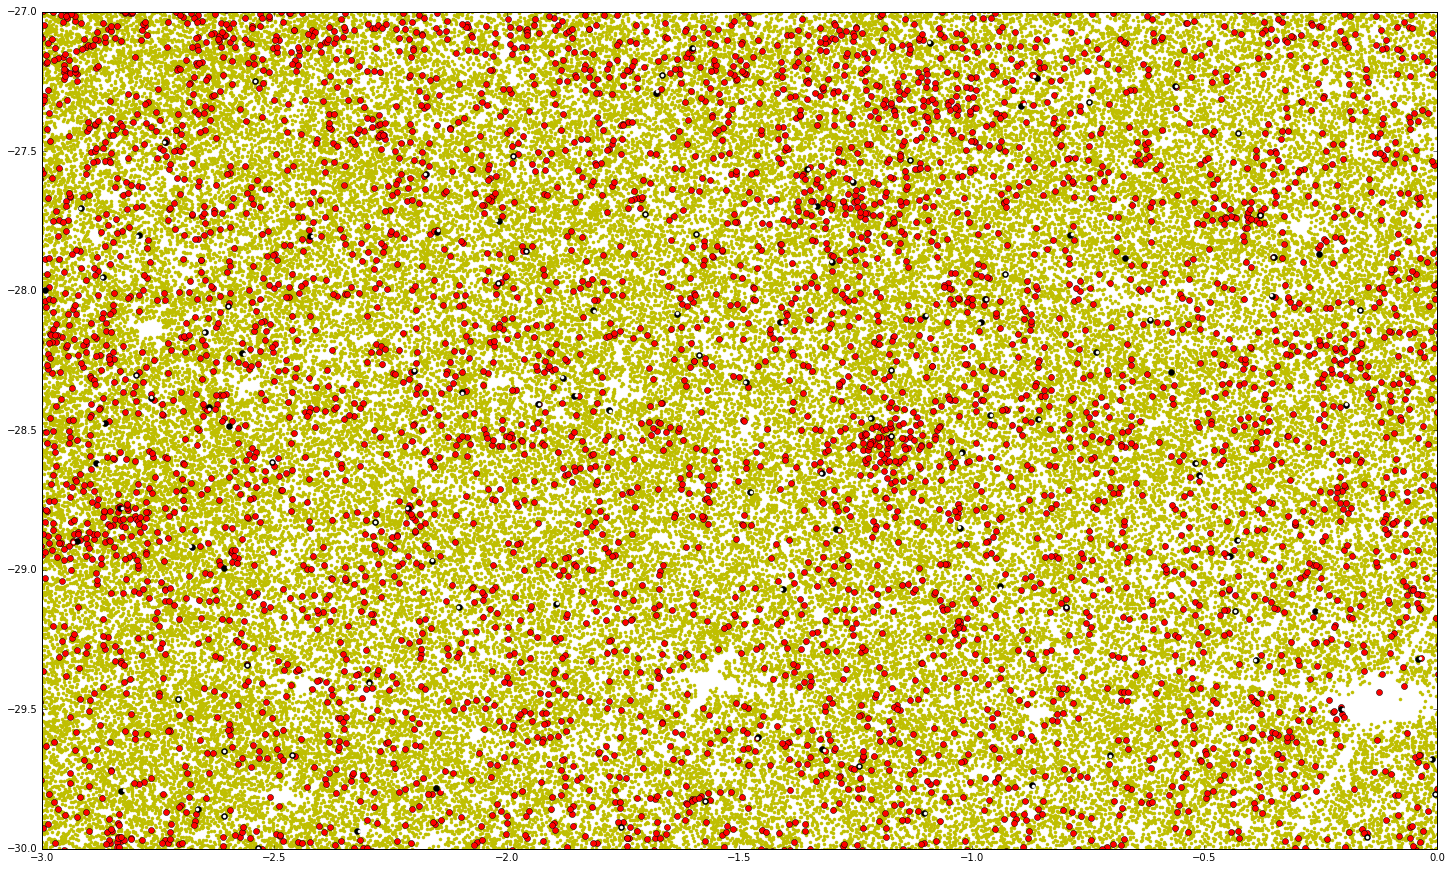

In [437]:
plt.figure(figsize=(25,15))
wg = (wisecats_low90[0].ra<0)&(wisecats_low90[0].ra>-5)
plt.plot(wisecats_low90[0].ra[wg],wisecats_low90[0].dec[wg],'y.')
plt.plot(w1scos.ra,w1scos.dec,'ro')
plt.plot(carroll16cat.ra,carroll16cat.dec,'ko')
plt.plot(carroll16cat_m.ra,carroll16cat_m.dec,'w.')
plt.xlim([-3,0])
plt.ylim([-30,-27])

In [501]:
num_matches_for_carroll_srcs = np.zeros((2,7,np.sum(g)))
matching_fluxes_for_carroll_srcs = np.zeros((2,7,np.sum(g)))

d = .5 # preliminary location localization in degs

for carrollcati in range(1):
    carrollcat = carroll16cat if carrollcati == 0 else carroll16cat_m
    for wi in range(5,7):
        for i in range(np.sum(g)):
            if i % 1000 == 0: print(i)
            
            if wi <= 3:
                wcat = wisecats_low90[wi]
            elif wi == 4:
                wcat = wiseagncat
            elif wi == 5:
                wcat = w1scos
            elif wi == 6:
                wcat = w2scos
            wnear = (carrollcat.ra[i]+d > wcat.ra)&(carrollcat.ra[i]-d < wcat.ra)
            dist_asec = np.sqrt((carrollcat.dec[i]-wcat.dec[wnear])**2 + np.sin(carrollcat.dec[i]*np.pi/180)**2*(carrollcat.ra[i]-wcat.ra[wnear])**2)*3600
            
            dcarroll_asec = 20#5*(np.abs(carrollcat.ddec[i])+np.abs(np.sin(carrollcat.dec[i]*np.pi/180.)*carrollcat.dra[i]))
            match = dist_asec < dcarroll_asec
            num_matches_for_carroll_srcs[carrollcati,wi,i] = np.sum(match)
            
            matching_fluxes_for_carroll_srcs[carrollcati,wi,i] = np.max(wcat.jy[wnear][np.where(match)[0]]) if np.sum(match) > 0 else 0

0
1000
2000
3000
0
1000
2000
3000


In [483]:
# carrollcat = carroll16cat
# i = 1000
# wnear = (carrollcat.ra[i]+d > wcat.ra)&(carrollcat.ra[i]-d < wcat.ra)
# dist_asec = np.sqrt((carrollcat.dec[i]-wcat.dec[wnear])**2 + np.sin(carrollcat.dec[i]*np.pi/180)**2*(carrollcat.ra[i]-wcat.ra[wnear])**2)*3600

# dcarroll_asec = 5*(np.abs(carrollcat.ddec[i])+np.abs(np.sin(carrollcat.dec[i]*np.pi/180.)*carrollcat.dra[i]))
# match = dist_asec < dcarroll_asec
# print(np.sum(match))
# print(dcarroll_asec)
# print(carrollcat.dra[i])
# plt.hist(dist_asec[dist_asec<200],50)

In [484]:
# carrollcat = carroll16cat_m
# wnear = (carrollcat.ra[i]+d > wcat.ra)&(carrollcat.ra[i]-d < wcat.ra)
# dist_asec = np.sqrt((carrollcat.dec[i]-wcat.dec[wnear])**2 + np.sin(carrollcat.dec[i]*np.pi/180)**2*(carrollcat.ra[i]-wcat.ra[wnear])**2)*3600

# dcarroll_asec = 5*(np.abs(carrollcat.ddec[i])+np.abs(np.sin(carrollcat.dec[i]*np.pi/180.)*carrollcat.dra[i]))
# match = dist_asec < dcarroll_asec
# print(np.sum(match))
# print(dcarroll_asec)
# print(carrollcat.dra[i])
# plt.hist(dist_asec[dist_asec<200],50)

In [485]:
# d = .5
# def foo():
#     wnear = (carrollcat.ra[i]+d > wisecats[wi].ra)&(carrollcat.ra[i]-d < wisecats[wi].ra)
#     return np.sqrt((carrollcat.dec[i]-wisecats[wi].dec[wnear])**2 + np.sin(carrollcat.dec[i]*np.pi/180)**2*(carrollcat.ra[i]-wisecats[wi].ra[wnear])**2)*3600
# %time dist_asec = foo()

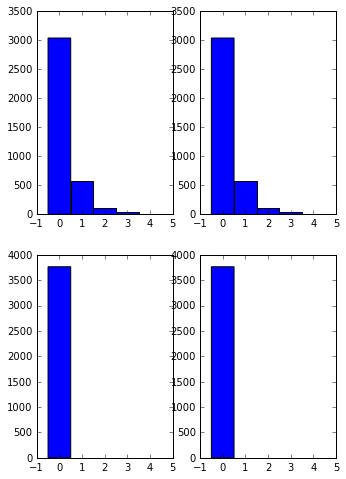

In [502]:
plt.figure(figsize=(20,8))
for carrollcati in range(2):
    for wi in range(5,7):
        plt.subplot(2,7,7*carrollcati+wi+1)
        plt.hist(num_matches_for_carroll_srcs[carrollcati,wi,:],[-.5,.5,1.5,2.5,3.5,4.5])

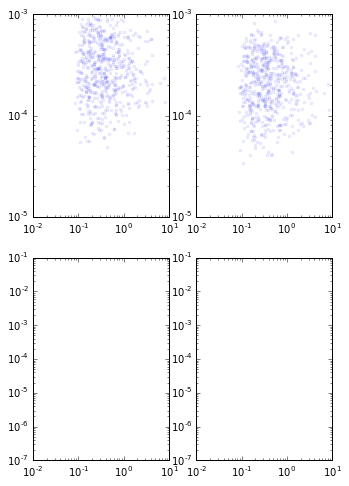

In [504]:
plt.figure(figsize=(20,8))
for carrollcati in range(2):
    for wi in range(5,7):
        plt.subplot(2,7,7*carrollcati+wi+1)
        carroll_sources_with_matching_flux = num_matches_for_carroll_srcs[carrollcati,wi,:] == 1
        plt.loglog(carroll16cat.jy[carroll_sources_with_matching_flux],matching_fluxes_for_carroll_srcs[carrollcati,wi,carroll_sources_with_matching_flux],'.',alpha=.075)
        plt.xlim([1.e-2,10])

In [318]:
a='J015319.82-220338.3| 28.3325951 -22.0606449|1.44|2.87|15.62|     |        | |           |                  |'

In [344]:
# # ALLWISEAGN
# wiseagnrawdat_lines = open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/J_ApJS_221_12/allwiseagn_full.dat').readlines()
# def line2dat(l):
#     return [float(l[20:30]),float(l[32:42]),float(l[54:59])]
# wiseagndat = np.array([line2dat(l) for l in wiseagnrawdat_lines[6:len(wiseagnrawdat_lines)-1]],dtype=float)

# ra = wiseagndat[:,0]
# dec = wiseagndat[:,1]
# mag = wiseagndat[:,2]
# wiseagncat = cat_utils.Catalog(ra,dec,309.54*10.**(-mag/2.5)*1000 )

(-30, -29)

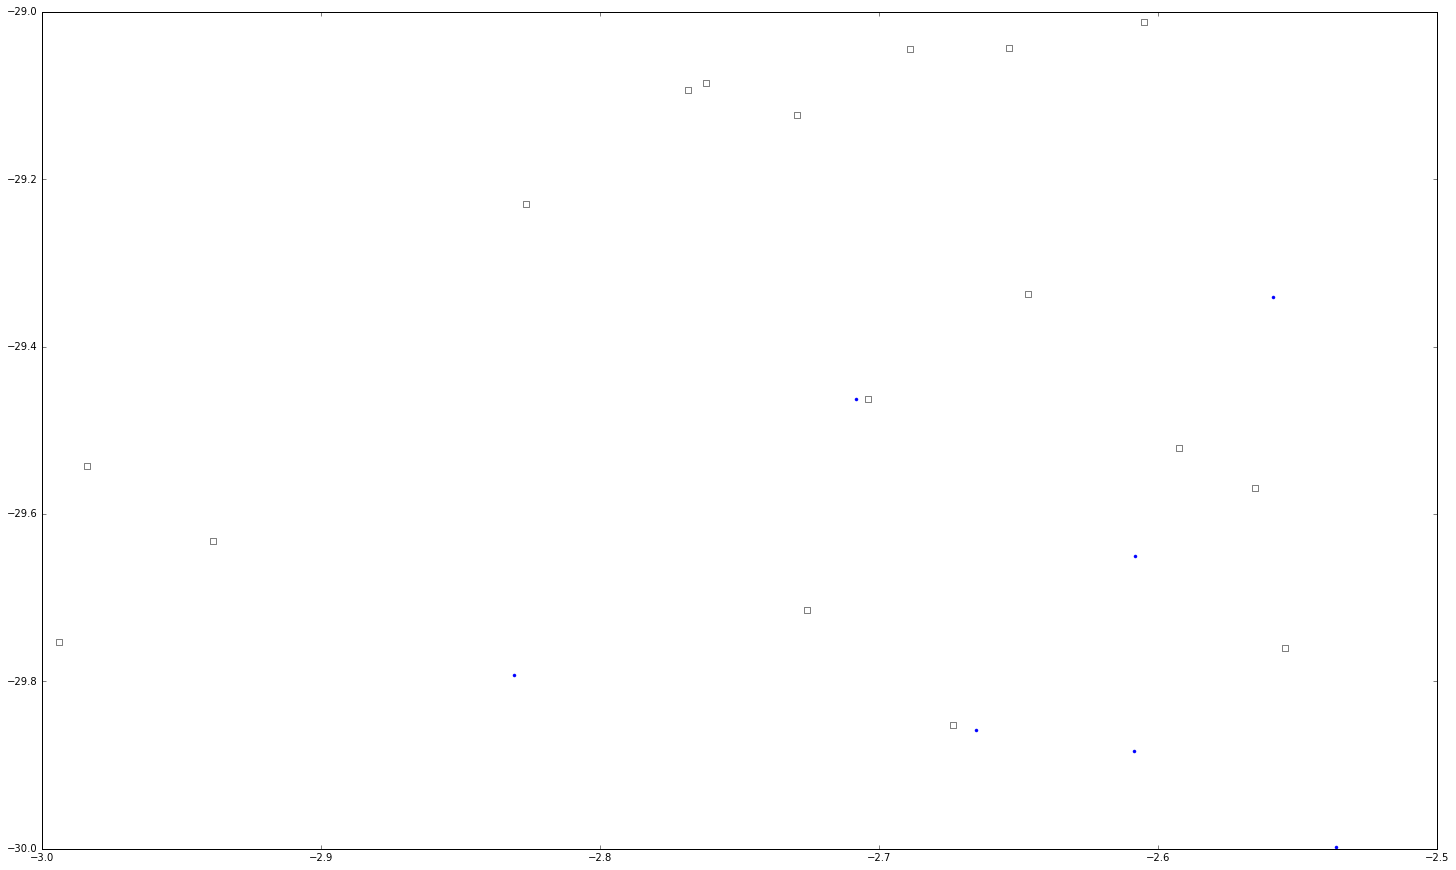

In [320]:
plt.figure(figsize=(25,15))
wg = (wisecats_low90[0].ra<0)&(wisecats_low90[0].ra>-5)
plt.plot(wiseagncat.ra,wiseagncat.dec,'ws')
plt.plot(carroll16cat.ra,carroll16cat.dec,'b.')
plt.xlim([-3,-2.5])
plt.ylim([-30,-29])